In [33]:
# load all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from time import time
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             r2_score, f1_score)
from scipy.stats import shapiro


In [35]:
df = pd.read_csv("supermarket_sales.csv")

In [37]:
display(df.describe())

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [39]:
print("The amout of missing values per row are: \n", df.isnull().sum())

The amout of missing values per row are: 
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [41]:
# Transform the Time variables
df["Date"] = pd.to_datetime(df["Date"])
df["Day_of_Week"] = df["Date"].dt.day_name()

df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour

# Categorising the Time variable 
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Midday"
    else:
        return "Evening"

df["Time_Category"] = df["Time"].apply(categorize_time)

In [43]:
# Set a theme for Datavisualisation
sns.set_theme(style="whitegrid", palette="pastel")

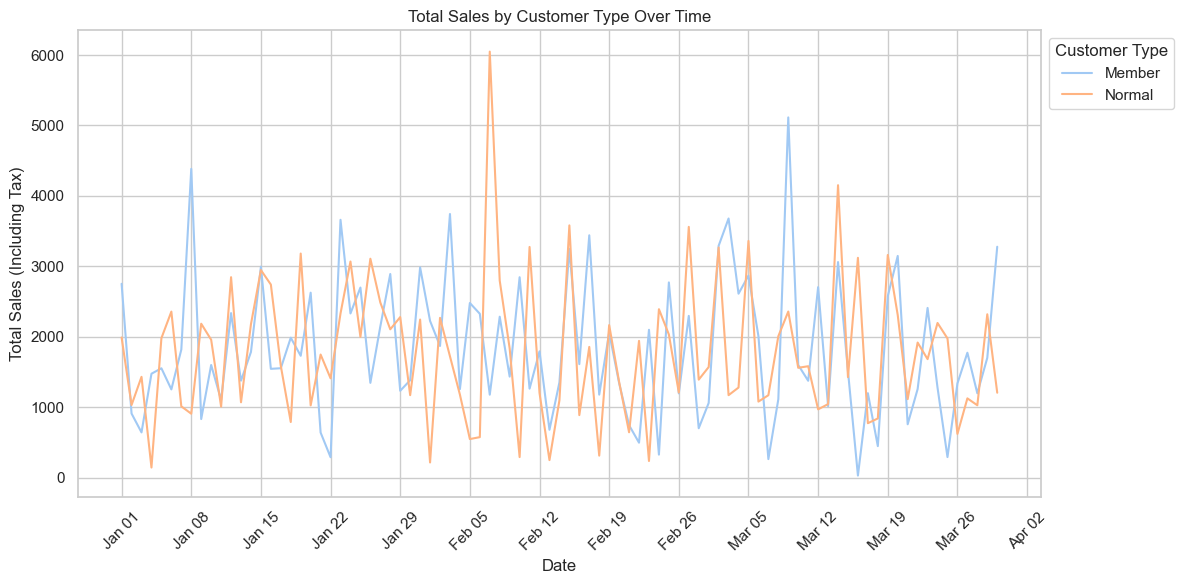

In [45]:
# Set the overall figure size
plt.figure(figsize=(12, 6))

# Create a line plot showing total sales over time, separated by customer type
sns.lineplot(
    data=df,
    x="Date",              # X-axis: dates of transactions
    y="Total",             # Y-axis: total sales (including tax)
    estimator="sum",       # Sum up sales values for each date
    errorbar=None,         # Disable error bars for a cleaner look
    hue="Customer type"    # Color-code lines based on customer type
)

# Set x-axis to show ticks at weekly intervals
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

# Format x-axis labels to show abbreviated month and day (e.g., Apr 01)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and axis labels
plt.title("Total Sales by Customer Type Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (Including Tax)")

# Place the legend outside the main plot for clarity
plt.legend(title="Customer Type", loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to prevent label/legend overlap
plt.tight_layout()

# Display the plot
plt.show()

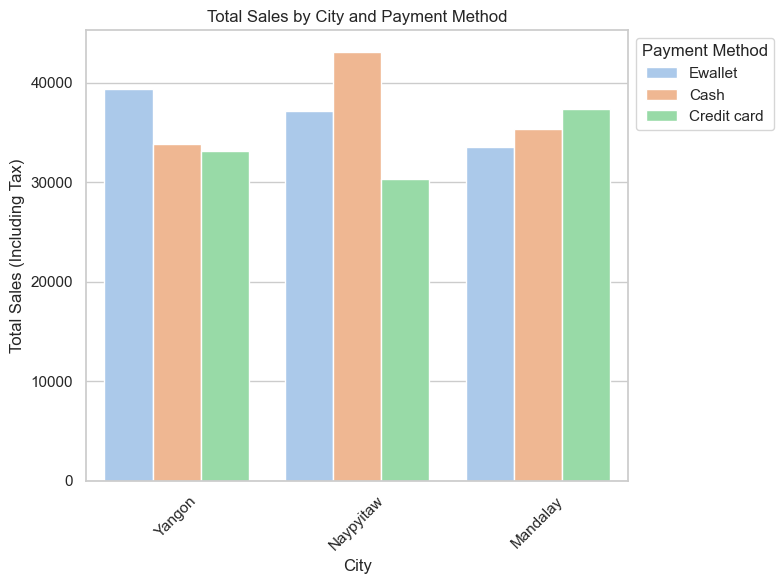

In [47]:
# Sales by Product Line 
# Set the overall figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar plot showing total sales per city, separated by payment method
sns.barplot(
    data=df,
    x="City",              # X-axis: city names
    y="Total",             # Y-axis: total sales (including tax)
    estimator="sum",       # Sum sales values for each city/payment group
    errorbar=None,         # Disable error bars for a cleaner look
    hue="Payment"          # Group bars by payment method with different colors
)

# Add a title and axis labels
plt.title("Total Sales by City and Payment Method")
plt.xlabel("City")
plt.ylabel("Total Sales (Including Tax)")

# Rotate x-axis labels for better readability if city names are long
plt.xticks(rotation=45)

# Position the legend outside the main plot to keep the chart uncluttered
plt.legend(title="Payment Method", loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap of elements
plt.tight_layout()

# Display the plot
plt.show()

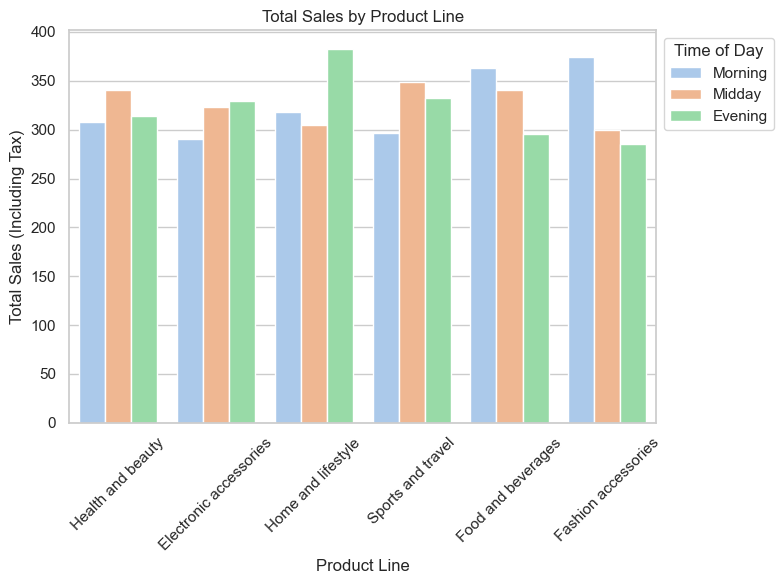

In [49]:
# Define the order in which the time categories should appear in the legend and plot
hue_order  = ["Morning", "Midday", "Evening"]

# Set the overall figure size
plt.figure(figsize=(8, 6))

# Create a grouped bar plot showing total sales by product line and time of day
sns.barplot(
    data=df,
    x="Product line",         # X-axis: product line categories
    y="Total",                # Y-axis: total sales (including tax)
    hue="Time_Category",      # Group bars by time of day (e.g., Morning, Midday, Evening)
    hue_order=hue_order,      # Specify the order of time categories in the legend and plot
    errorbar=None             # Disable error bars for a cleaner appearance
)

# Add a title and axis labels
plt.title("Total Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales (Including Tax)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set a descriptive legend title and move the legend outside the plot area
plt.legend(title="Time of Day", loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout to avoid overlap of labels and legend
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\kilss\AppData\Local\Temp\ipykernel_31280\3658820674.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


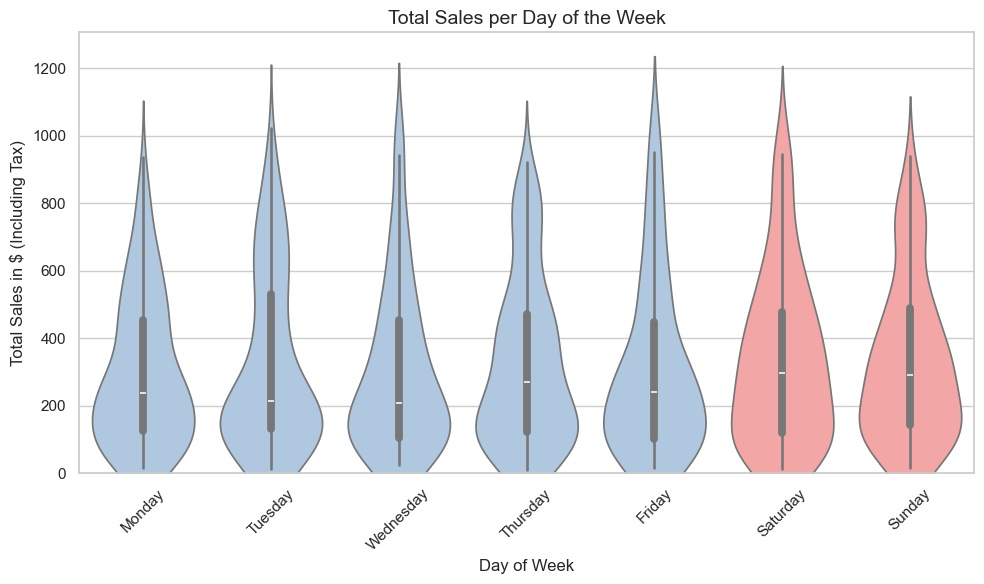

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set Seaborn's theme and a custom pastel color palette
sns.set_theme(style="whitegrid", palette="pastel")

# Define the order of days to ensure they appear in calendar order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Define a custom color palette to highlight weekends in red and weekdays in blue
custom_palette = {
    "Monday": "#A7C7E7",
    "Tuesday": "#A7C7E7",
    "Wednesday": "#A7C7E7",
    "Thursday": "#A7C7E7",
    "Friday": "#A7C7E7",
    "Saturday": "#FF9999",   # Highlight weekends
    "Sunday": "#FF9999"
}

# Create a violin plot to show the distribution of total sales for each day of the week
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x="Day_of_Week",      # X-axis: day of the week
    y="Total",            # Y-axis: total sales (including tax)
    order=day_order,      # Ensure days are in logical calendar order
    palette=custom_palette  # Apply custom colors
)

# Add a title and axis labels with custom font sizes
plt.title("Total Sales per Day of the Week", fontsize=14)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Total Sales in $ (Including Tax)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the lower limit of the y-axis to start at 0
plt.ylim(bottom=0)

# Adjust layout to avoid overlap and make the plot presentation-ready
plt.tight_layout()

# Display the plot
plt.show()

In [53]:
# Define a list of categorical columns to be encoded
categorical_cols = ["Product line", "Customer type", "Branch", "Payment", "Day_of_Week", "Time_Category"]

# Create a new DataFrame `df_reg` containing only numerical features plus the selected categorical columns
df_reg = df[["Unit price", "Quantity", "Total"] + categorical_cols]  

# Initialize the OneHotEncoder
# `drop="first"` avoids the dummy variable trap by dropping the first category of each feature
ohe = OneHotEncoder(drop="first") 

# Fit the encoder on the categorical columns and transform them into one-hot encoded format
# Convert the resulting array to a DataFrame with appropriate column names and the same index as the original DataFrame
df_encoded = pd.DataFrame(
    ohe.fit_transform(df_reg[categorical_cols]).toarray(),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=df.index
)

# Drop the original categorical columns from df_reg
# Concatenate the one-hot encoded columns to the remaining numerical data
df_reg = pd.concat([df_reg.drop(columns=categorical_cols), df_encoded], axis=1)

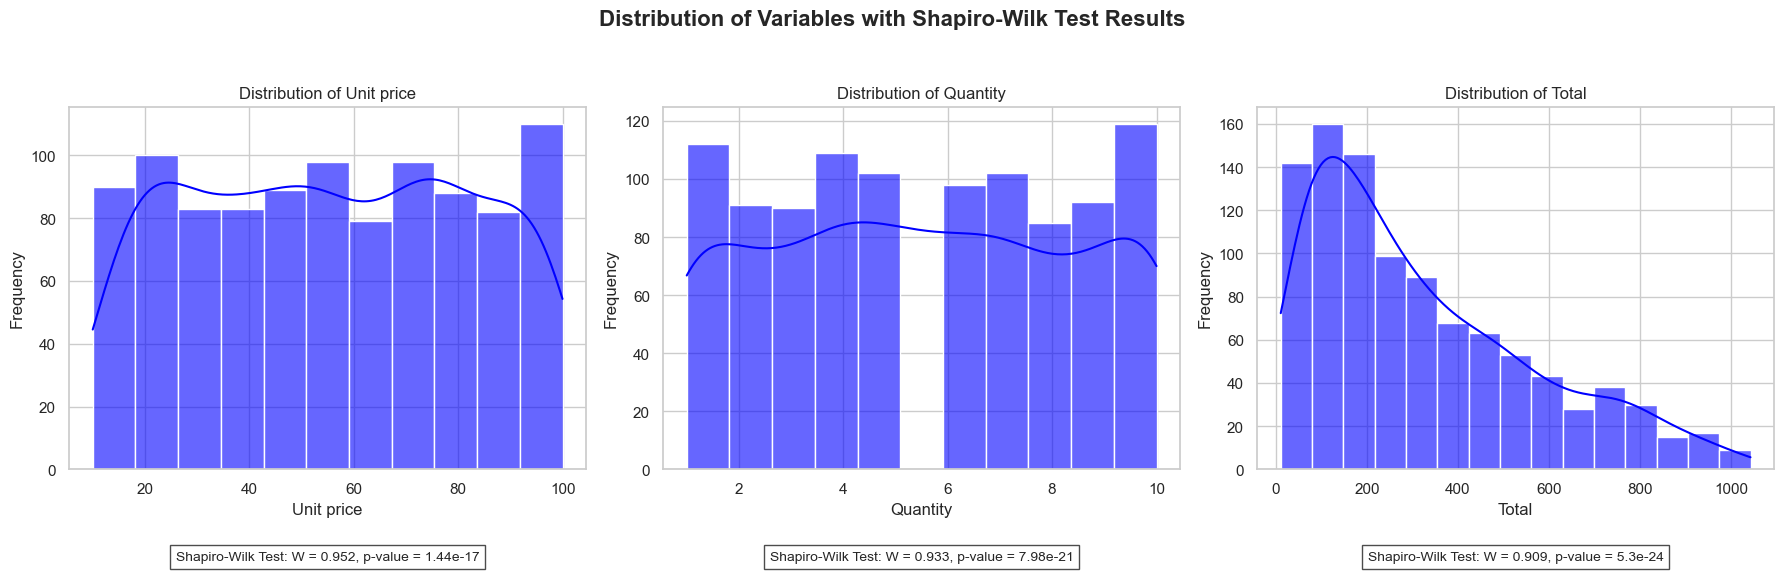

In [55]:
# Function to perform Shapiro-Wilk test
# Define a function to perform the Shapiro-Wilk normality test
# Returns a formatted string with the W statistic and p-value
def shapiro_test(data):
    stat, p = shapiro(data)
    # If p-value is extremely small, report it as < 0.0001 for readability
    return f"Shapiro-Wilk Test: W = {stat:.3f}, p-value = {p:.3g}" if p >= 0 else "Shapiro-Wilk Test: W = {stat:.4f}, p-value < 0.0001"

# Create a 1-row, 3-column layout of subplots with a specified figure size
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

# Set a common title for the entire figure
fig.suptitle("Distribution of Variables with Shapiro-Wilk Test Results", fontsize=16, fontweight='bold')

# Define the variables to visualize
variables = ['Unit price', 'Quantity', 'Total']

# Loop through each variable and corresponding subplot axis
for i, var in enumerate(variables):
    # Plot a histogram with a KDE (smoothed line) on the current axis
    sns.histplot(df_reg[var], kde=True, ax=axs[i], color='blue', alpha=0.6)
    
    # Set title and axis labels for each subplot
    axs[i].set_title(f"Distribution of {var}")
    axs[i].set_xlabel(var)
    axs[i].set_ylabel("Frequency")
    
    # Perform the Shapiro-Wilk test for normality on the variable
    test_result = shapiro_test(df_reg[var])
    
    # Display the test result as a text box below the plot
    axs[i].text(
        0.5, -0.25, test_result, transform=axs[i].transAxes,  # Position below plot using relative axes coordinates
        fontsize=10, ha='center',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Box styling for readability
    )

# Adjust spacing to avoid overlap and reserve space at the top for the title
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Show the final combined plot
plt.show()

In [57]:
# Separate the feature variables (X) and the target variable (y)
# Drop the target column "Total" from the feature set
X = df_reg.drop(columns=["Total"])  # Features used to predict sales
y = df_reg["Total"]                 # Target variable: total sales (including tax)

# Split the data into training and testing sets
# test_size=0.2 -> 20% of the data will be used for testing
# shuffle=False -> preserve the original order of the data (important for time-series or ordered data)
# random_state=42 -> ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [59]:
print(f"X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns.")
print(f"X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns.")
print(f"y_train has {y_train.shape[0]} rows.")
print(f"y_test has {y_test.shape[0]} rows.")

X_train has 800 rows and 20 columns.
X_test has 200 rows and 20 columns.
y_train has 800 rows.
y_test has 200 rows.


In [61]:
# Instantiating a linear Regression
regr = LinearRegression()

In [63]:
# Train the model and time it
# Record the start time before training the model
time_start = time()

# Fit (train) the regression model on the training data
regr.fit(X_train, y_train)

# Record the end time after training is complete
time_end = time()

# Calculate the total runtime by subtracting the start time from the end time
runtime = time_end - time_start

# Print the runtime of the model training
print(f"Runtime of model training is: {runtime}.")

Runtime of model training is: 0.03131222724914551.


In [65]:
# Print scores
print("Score on train set : " , regr.score(X_train, y_train))
print("Score on test set : ", regr.score(X_test,y_test))

Score on train set :  0.8947420993259745
Score on test set :  0.8799908460405526


In [67]:
# Predic on X_test, instantiate a 'y_pred' object and time the prediction
# Record the start time before making predictions
time_start2 = time()

# Use the trained regression model to make predictions on the test set
y_pred = regr.predict(X_test)

# Record the end time after predictions are complete
time_end2 = time()

# Calculate how long the prediction process took
runtime2 = time_end2 - time_start2

# Print the runtime of the prediction step
print(f"Runtime of model prediction is: {runtime2}.")

Runtime of model prediction is: 0.002034902572631836.


In [69]:
# Finding the right parameters for the ramdom forrest regressor
# Define a grid of hyperparameters to search over for the Random Forest model
param_grid = {
    'n_estimators': [2050, 2100, 2150],         # Number of trees in the forest
    'max_depth': [None, 10, 30],                # Maximum depth of the tree (None = expand until all leaves are pure)
    'min_samples_split': [2, 5],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],                 # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]      # Number of features to consider when looking for the best split
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to perform exhaustive search over the parameter grid
# - estimator: model to tune
# - param_grid: the hyperparameter combinations to try
# - cv: 5-fold cross-validation
# - scoring: use negative MSE as the performance metric
# - n_jobs=-1: use all available cores to speed up the search
# - verbose=2: print detailed logs of the training process
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search object on the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print out the best combination of hyperparameters found
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2100}


In [71]:
# Split the training data further into a smaller training set and a validation set
# This is done to test the models with a smaller subset of data before final evaluation
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Best hyperparameters from previous grid search or manual tuning
best_params = {
    'max_depth': None,               # No limit on the depth of the trees
    'max_features': None,            # Use all features when splitting a node
    'min_samples_leaf': 2,           # Minimum samples required to be at a leaf node
    'min_samples_split': 2          # Minimum samples required to split an internal node
}

# Initialize and train the model with 2100 trees (large model)
model_large = RandomForestRegressor(n_estimators=2100, random_state=42, **best_params)
model_large.fit(X_train_small, y_train_small)  # Fit the model on the smaller training set
y_pred_large = model_large.predict(X_test_small)  # Predict on the smaller test set

# Initialize and train the model with 1000 trees (smaller model)
model_small = RandomForestRegressor(n_estimators=1000, random_state=42, **best_params)
model_small.fit(X_train_small, y_train_small)  # Fit the smaller model
y_pred_small = model_small.predict(X_test_small)  # Predict using the smaller model

# Define a function to evaluate and print performance metrics
# This function computes and prints RMSE (Root Mean Squared Error) and R² (R-squared)
def evaluate(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)  # Calculate Mean Squared Error
    rmse = np.sqrt(mse)                       # Calculate Root Mean Squared Error (RMSE)
    r2 = r2_score(y_true, y_pred)             # Calculate R² (coefficient of determination)
    
    # Print evaluation results
    print(f"\n{label} Performance:")
    print(f"RMSE: {rmse:.4f}")  # Print RMSE rounded to 4 decimal places
    print(f"R²:   {r2:.4f}")    # Print R² rounded to 4 decimal places

# Evaluate and compare the performance of both models
evaluate(y_test_small, y_pred_large, label="Large Model (2100 trees)")  # Evaluation for large model
evaluate(y_test_small, y_pred_small, label="Smaller Model (1000 trees)")  # Evaluation for smaller model



Large Model (2100 trees) Performance:
RMSE: 12.7468
R²:   0.9978

Smaller Model (1000 trees) Performance:
RMSE: 12.7393
R²:   0.9978


In [73]:
#Instatiating the Random Forest Regressor with optimized hyperarameters
rf = RandomForestRegressor(
    n_estimators=1000,
    max_depth=None,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)

In [75]:
# Record the start time before training the Random Forest model
time_start = time()

# Train the Random Forest model on the full training dataset (X_train, y_train)
rf.fit(X_train, y_train)

# Record the end time after the model has finished training
time_end = time()

# Calculate the total time taken for training by subtracting start time from end time
runtime = time_end - time_start

# Print out the runtime of the model training process
print(f"Runtime of model training is: {runtime}.")

Runtime of model training is: 2.689375162124634.


In [77]:
print("Score on train set : " , rf.score(X_train, y_train))
print("Score on test set : ", rf.score(X_test,y_test))

Score on train set :  0.999748053829459
Score on test set :  0.9988092208151359


In [79]:
# Make predictions for the training set and calculate residuals of the linear regression
y_train_pred_reg = regr.predict(X_train)  # Predictions on training data
residuals_train_reg = y_train - y_train_pred_reg  # Residuals (difference between actual and predicted values for training set)

# Make predictions for the test set and calculate residuals
residuals_test = y_test - y_pred  # Residuals for test set

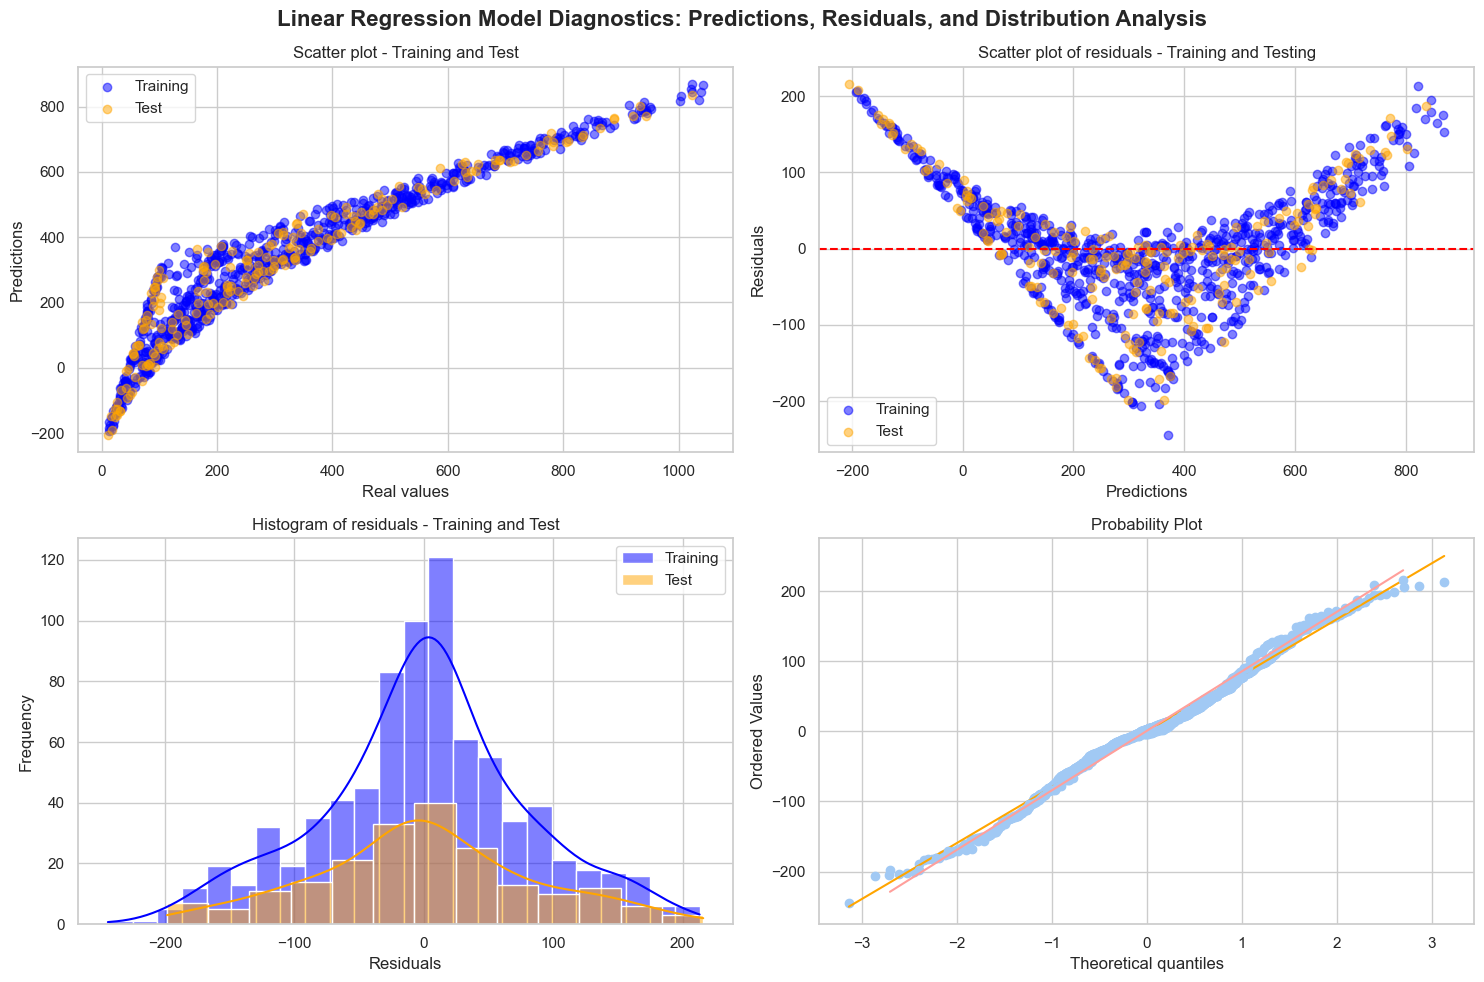

In [81]:
# Create a 2x2 grid of subplots for the diagnostics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Add a main title to the entire figure
fig.suptitle("Linear Regression Model Diagnostics: Predictions, Residuals, and Distribution Analysis", fontsize=16, fontweight='bold')

# Plot 1: Combined scatter plot for training and test set predictions
# Compare real vs predicted values for both training and test data
axs[0, 0].scatter(y_train, y_train_pred_reg, alpha=0.5, label='Training', color='blue')
axs[0, 0].scatter(y_test, y_pred, alpha=0.5, label='Test', color='orange')
axs[0, 0].plot([min(y_train + y_test), max(y_train + y_test)], [min(y_train + y_test), max(y_train + y_test)], color='red')  # Reference line y=x
axs[0, 0].set_xlabel('Real values')  # Label for x-axis
axs[0, 0].set_ylabel('Predictions')  # Label for y-axis
axs[0, 0].set_title('Scatter plot - Training and Test')  # Title for the plot
axs[0, 0].legend()  # Show legend

# Plot 2: Scatter plot of residuals for training and test data
# Residuals are the differences between the true and predicted values
axs[0, 1].scatter(y_train_pred_reg, residuals_train_reg, alpha=0.5, label='Training', color='blue')
axs[0, 1].scatter(y_pred, residuals_test, alpha=0.5, label='Test', color='orange')
axs[0, 1].axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 (no error)
axs[0, 1].set_xlabel('Predictions')  # Label for x-axis
axs[0, 1].set_ylabel('Residuals')  # Label for y-axis
axs[0, 1].set_title('Scatter plot of residuals - Training and Testing')  # Title for the plot
axs[0, 1].legend()  # Show legend

# Plot 3: Histogram of residuals for both training and test data
# This helps visualize the distribution of errors
sns.histplot(residuals_train_reg, kde=True, color='blue', label='Training', alpha=0.5, ax=axs[1, 0])
sns.histplot(residuals_test, kde=True, color='orange', label='Test', alpha=0.5, ax=axs[1, 0])
axs[1, 0].set_xlabel('Residuals')  # Label for x-axis
axs[1, 0].set_ylabel('Frequency')  # Label for y-axis
axs[1, 0].set_title('Histogram of residuals - Training and Test')  # Title for the plot
axs[1, 0].legend()  # Show legend

# Plot 4: QQ plot of residuals to check for normality
# The QQ plot helps assess whether the residuals follow a normal distribution
stats.probplot(residuals_train_reg, dist="norm", plot=axs[1, 1])  # QQ plot for training residuals
axs[1, 1].set_title("QQ-plot des Residuals - Formation")  # Title for the plot
stats.probplot(residuals_test, dist="norm", plot=axs[1, 1])  # QQ plot for test residuals
axs[1, 1].get_lines()[1].set_color('orange')  # Change color of the line for test data

# Adjust layout to ensure everything fits nicely in the figure
plt.tight_layout()

# Show the plots
plt.show()

In [91]:
# Make predictions for the training set and calculate residuals of the random forrest regression
y_train_pred_rf = rf.predict(X_train)  # Predictions on training data
residuals_train_rf = y_train - y_train_pred_rf  # Residuals (difference between actual and predicted values for training set)

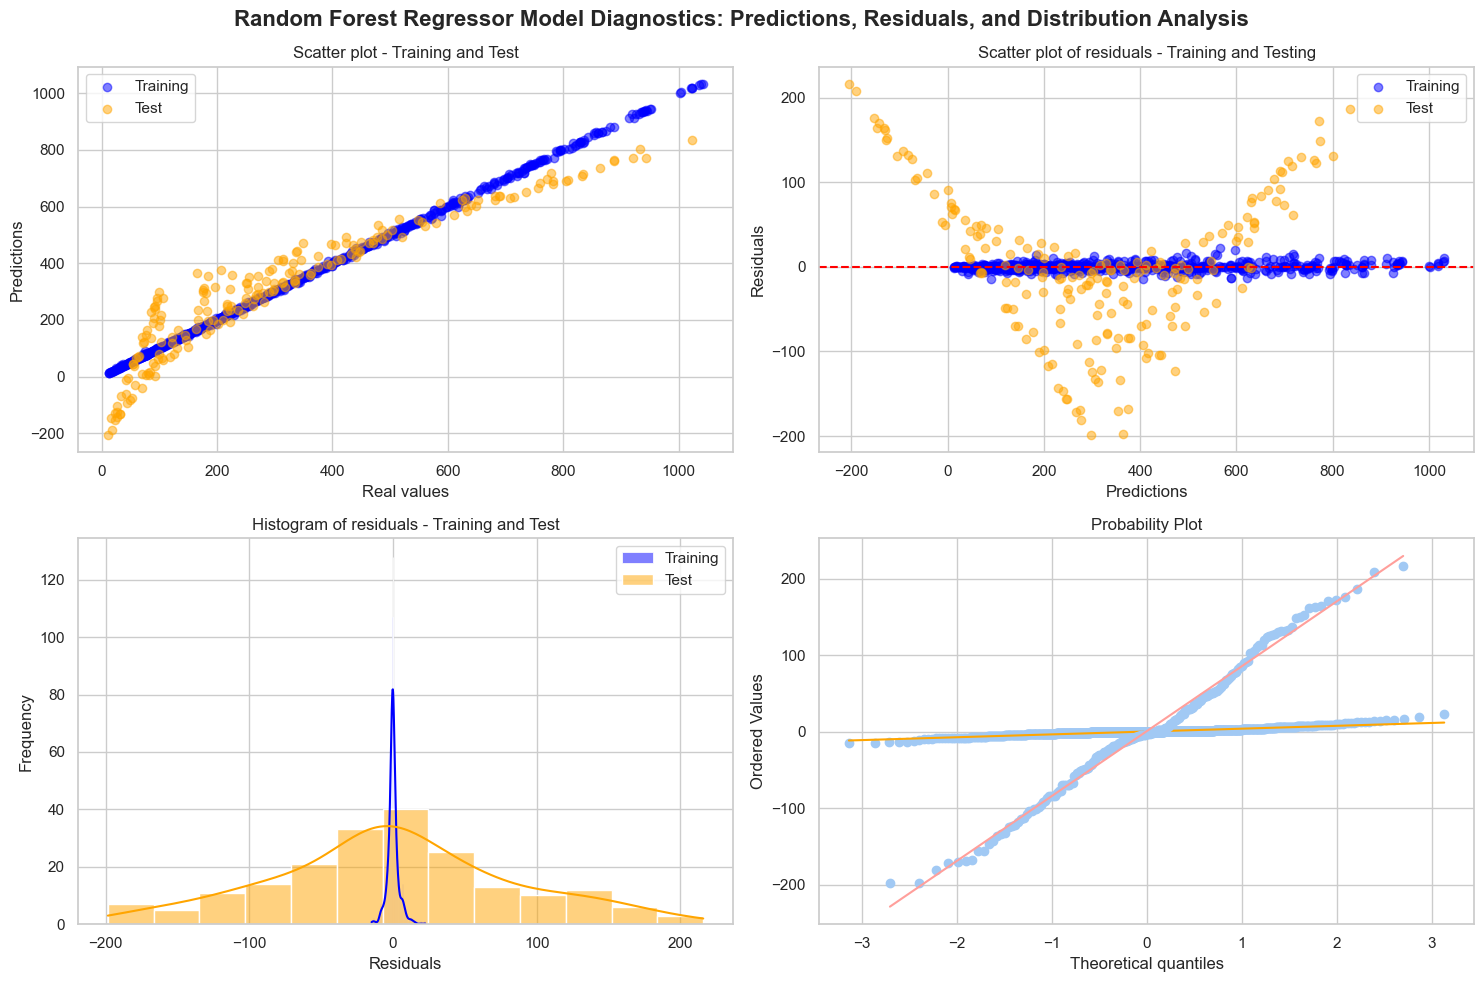

In [93]:
# Create a 2x2 grid of subplots for Random Forest Regressor diagnostics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Add a main title to the entire figure
fig.suptitle("Random Forest Regressor Model Diagnostics: Predictions, Residuals, and Distribution Analysis", fontsize=16, fontweight='bold')

# Plot 1: Combined scatter plot for training and test set predictions
# Compare actual values (y_train and y_test) with predicted values (y_train_pred_rf and y_pred) for both training and test sets
axs[0, 0].scatter(y_train, y_train_pred_rf, alpha=0.5, label='Training', color='blue')  # Plot training data
axs[0, 0].scatter(y_test, y_pred, alpha=0.5, label='Test', color='orange')  # Plot test data
axs[0, 0].plot([min(y_train + y_test), max(y_train + y_test)], [min(y_train + y_test), max(y_train + y_test)], color='red')  # Reference line y=x
axs[0, 0].set_xlabel('Real values')  # Label for the x-axis (Actual values)
axs[0, 0].set_ylabel('Predictions')  # Label for the y-axis (Predicted values)
axs[0, 0].set_title('Scatter plot - Training and Test')  # Title for the plot
axs[0, 0].legend()  # Add legend for training and test data

# Plot 2: Scatter plot of residuals (errors) for training and test sets
# Residuals are the differences between the true values and predicted values
axs[0, 1].scatter(y_train_pred_rf, residuals_train_rf, alpha=0.5, label='Training', color='blue')  # Plot residuals for training data
axs[0, 1].scatter(y_pred, residuals_test, alpha=0.5, label='Test', color='orange')  # Plot residuals for test data
axs[0, 1].axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 (no error)
axs[0, 1].set_xlabel('Predictions')  # Label for x-axis (Predicted values)
axs[0, 1].set_ylabel('Residuals')  # Label for y-axis (Residuals)
axs[0, 1].set_title('Scatter plot of residuals - Training and Testing')  # Title for the plot
axs[0, 1].legend()  # Add legend for residuals (training and test)

# Plot 3: Histogram of residuals for both training and test sets
# Visualize the distribution of residuals (errors)
sns.histplot(residuals_train_rf, kde=True, color='blue', label='Training', alpha=0.5, ax=axs[1, 0])  # Plot residuals for training data
sns.histplot(residuals_test, kde=True, color='orange', label='Test', alpha=0.5, ax=axs[1, 0])  # Plot residuals for test data
axs[1, 0].set_xlabel('Residuals')  # Label for x-axis (Residuals)
axs[1, 0].set_ylabel('Frequency')  # Label for y-axis (Frequency)
axs[1, 0].set_title('Histogram of residuals - Training and Test')  # Title for the plot
axs[1, 0].legend()  # Add legend for training and test residuals

# Plot 4: QQ plot to assess the normality of residuals for training and test sets
# The QQ plot compares the distribution of residuals to a normal distribution
stats.probplot(residuals_train_rf, dist="norm", plot=axs[1, 1])  # QQ plot for training residuals
axs[1, 1].set_title("QQ-plot des Residuals - Formation")  # Title for the QQ plot (training residuals)
stats.probplot(residuals_test, dist="norm", plot=axs[1, 1])  # QQ plot for test residuals
axs[1, 1].get_lines()[1].set_color('orange')  # Change color of the line for test data

# Adjust layout so all elements fit within the figure
plt.tight_layout()

# Show the plots
plt.show()